# <center>Predictive modelling with timeseries  </center>
# <center> Part 2 -  Exponential Smoothing</center>

![Image](images/timeseries.jpg)

Think of the two simple forecasts we've seen earlier:
* the **naive forecast**  assumes that the most recent observation is the only important one
* the **average forecast**  assumes that all past observations are of equal importance  

These two methods are extremes, and therefore, simplifications of reality. Most of the times we'll need a model  that is in between.  
That's what `exponential smoothing` can do:
* gives different weight to all past observations (unlike the average)  
...BUT...  
* considers that most recent observations should have a relative higher importance (and hence, more weight)


### Weights (alpha)  

* The degree of smoothing will be given by the parameter `alpha`. 
* Alpha ranges from 0 to 1  
* The sum of the 'alphas' of the entire time series is aprox. equal to 1
* The table below illustrates the division of weights depending on the choosen alpha, for a time series of 6 points. When alpha=0.2, the difference between the weight of the latest observation (0.2) and the first observation (0.0655) is only 0.14, meaning that weights are more equally distributed. Now, when alpha = 0.8, the diference is 0.7997, and the latest observations have a much bigger impact in the prediction.

![Image](images/alpha.png) *Table source: Hyndman and Athanasopoulos. www.otexts.com/fpp2/*


### Example:  

* The original data is in green.  
* The red line shows the forecast using the **lowest alpha**. It makes a broad generalization of the data (almost like an average).
* The blue line was produced with an **alpha of 0.5** and captures most of the oscillations.
* The pink line has a very **high alpha**, and mostly reproduces the original data but shifting it 1 period in time.
* The best forecast is that with the lowest MSE

![Image](images/es.png) 

### Logic of the exercise 

We want to visualize and compare the behavior of different `exponential smoothing` methods. 

1. Load the dataset and split it into train and test data
2. Plot only the training data
3. Predict the next __ using the baselines shown above
4. Plot the baselines
5. Add the test data to the plot and compare results:  
    a. Which baseline did a better job?  
    b. Express the error with numbers. Calculate the MAE, MAPE, and MASE in the test set

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# jupyter lab configs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from utils import print_errors

import plotly.graph_objects as go
import plotly.express as px

### Load the datasets

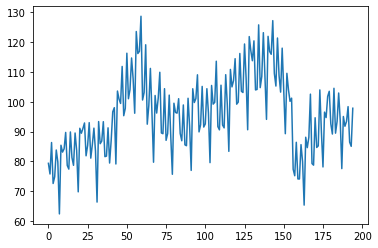

In [2]:
# load a nice example for decomposition - production of electrical equipments
ele_df = pd.read_csv('datasets/elecequip.csv')
ele_df['value'].plot()

### Split train and test 

In [3]:
train = ele_df.loc[:150, 'value']
test = ele_df.loc[150:, 'value']
test_start = 150
test_end = 194

# Simple exponential smoothing

This is a simple method, used when there's no obvious trend or seasonality in the data.  
To understand what it does, experiment with the effects of changing `alpha`:

In [4]:
from statsmodels.tsa.api import SimpleExpSmoothing

### Observe the effect of alpha

Each plot has the same training data but varying levels of alpha

<Figure size 720x288 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


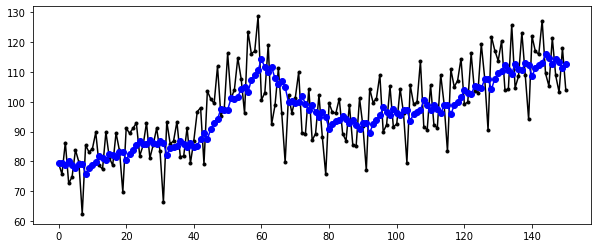

<Figure size 720x288 with 0 Axes>

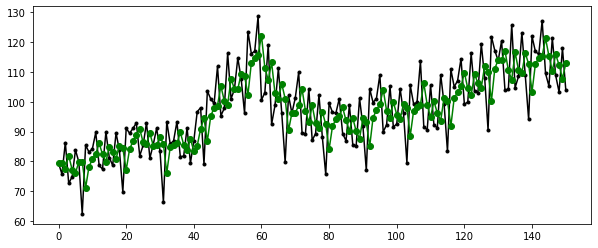

<Figure size 720x288 with 0 Axes>

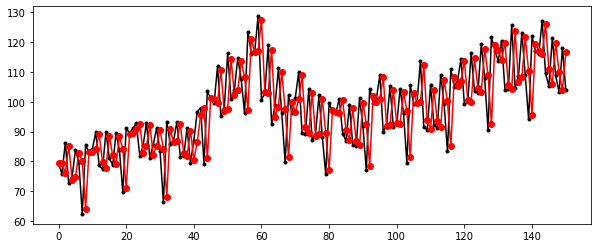

In [5]:
plt.figure(figsize=(10, 4))
# plot train data
plt.plot(train,  marker='.', color='black')
# create different traces to see the effect of changing alpha:
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.2, optimized=False)
plt.plot(fit1.fittedvalues, marker='o', color='blue')
plt.show()

# create plot
plt.figure(figsize=(10, 4))
# plot train data
plt.plot(train,  marker='.', color='black')
# create different traces to see the effect of changing alpha:
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.5, optimized=False)
plt.plot(fit1.fittedvalues, marker='o', color='green')
plt.show()

# create plot
plt.figure(figsize=(10, 4))
# plot train data
plt.plot(train,  marker='.', color='black')
# create different traces to see the effect of changing alpha:
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.9, optimized=False)
plt.plot(fit1.fittedvalues, marker='o', color='red')

plt.show()

---

# Exponential smoothing for trending and/or seasonal data  
 
Most commonly known methods belong to the `Holt-Winter's` family.  
These methods can handle the combination of different trends and seasonalities (none, additive, and multiplicative).


### In practice 
 
In Python, the `Holt-Winter's` family of methods is available in the package `holtwinters` from library `statsmodels`.   
You can find the documentation here: https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html.  

The method `ExponentialSmoothing` accepts one of {`'add'`, `'mul'`, or `None`} for the parameters `trend` and `seasonality`

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
seasonal_periods = 30
fitted_model = ExponentialSmoothing(train, trend=None, seasonal='add', seasonal_periods=seasonal_periods).fit()
fitted_model.summary()

Dep. Variable:,value,No. Observations:,151
Model:,ExponentialSmoothing,SSE,3849.713
Optimized:,True,AIC,553.010
Trend:,None,BIC,649.563
Seasonal:,Additive,AICC,573.527
Seasonal Periods:,30,Date:,"Wed, 20 Oct 2021"
Box-Cox:,False,Time:,13:36:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4543810,alpha,True
smoothing_seasonal,1.3e-10,gamma,True


In [8]:
test_predictions = fitted_model.forecast(len(test)).rename('Predictions')
print_errors(test, test_predictions, 'test')

ERRORS in test
MAE: 17.161266532945568
RMSE: 21.406023105962618
MAPE: 19.344525227364798
RMSPE: 0.21890740096155215


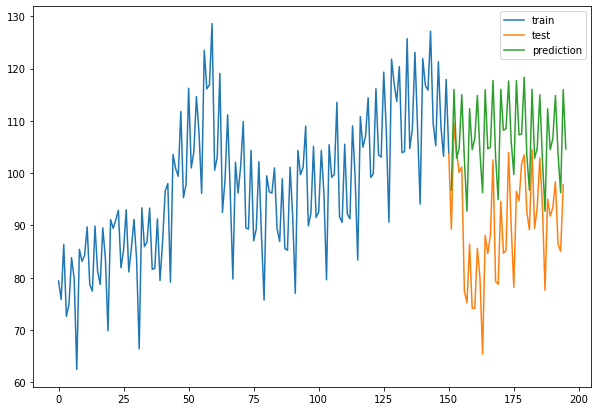

In [9]:
train.plot(legend=True,label='train')
test.plot(legend=True,label='test',figsize=(10,7))
test_predictions.plot(legend=True,label='prediction');

### What happens if you set trend and seasonality to `None` 🤔?

### Change the number of `seasonal_periods` and see what happens with the number of coefficients estimated

## Can we improve?
Try out different trend and seasonality types. I suggest using **BIC** and **AIC** to compare the different models since they will have different complexities, besides using MAE, RMSE etc.

---

<a href='https://www.freepik.com/vectors/business'>Business vector created by freepik - www.freepik.com</a>